## Importing Libraries 


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## File visualitation and Data Cleaning

In [45]:
data = pd.read_csv("Uber Request Data.csv")
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [46]:
print(data.info(), "\n")
print(data.describe(), "\n")
print(data.isnull().sum(), "\n")
print(data.duplicated().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None 

        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000 

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp     

## Cleaning Data



In [47]:
data.drop("Driver id" , axis = 1 , inplace = True )                 # Driver id is not important and its contain 2650 null data
data.drop("Request id" , axis = 1 , inplace = True )                # Request id is not important too


In [48]:
data["Status"].nunique()                                   # null data in Drop timestamp due to Uncompleted Trips 
data["Drop timestamp"].fillna(value = "No Ride" , inplace = True)
# here we fill null data in Drop timestamp with no ride


In [157]:
data.info()
data.isnull().sum()
#Clean data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pickup point       6745 non-null   object
 1   Status             6745 non-null   object
 2   Request timestamp  6745 non-null   object
 3   Drop timestamp     6745 non-null   object
dtypes: object(4)
memory usage: 210.9+ KB


Pickup point         0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [158]:
data.head()

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Converte timestamp (Request & drop) to data time


In [159]:
data_completed = data[data["Status"]=="Trip Completed"]                  #taking only complete trips in new data-frame
data_completed["Request timestamp"]=pd.to_datetime(data_completed["Request timestamp"])
data_completed["Drop timestamp"]=pd.to_datetime(data_completed["Drop timestamp"])
data_completed.head()


C:\Users\abdos\AppData\Local\Temp\ipykernel_11064\3510638461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_completed["Request timestamp"]=pd.to_datetime(data_completed["Request timestamp"])
C:\Users\abdos\AppData\Local\Temp\ipykernel_11064\3510638461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_completed["Drop timestamp"]=pd.to_datetime(data_completed["Drop timestamp"])


,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [160]:
data_completed.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2830
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       2831 non-null   object        
 1   Status             2831 non-null   object        
 2   Request timestamp  2831 non-null   datetime64[ns]
 3   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 110.6+ KB


In [180]:
data_completed["Req month_name"]=data_completed["Request timestamp"].dt.month_name()
data_completed["Req day_name"]=data_completed["Request timestamp"].dt.day_name()
data_completed["Req hour"]=data_completed["Request timestamp"].dt.hour
data_completed["Ride Time"]=data_completed['Drop timestamp']-data_completed['Request timestamp']     #Calculating Trip Time
data_completed.head()



,Pickup point,Status,Request timestamp,Drop timestamp,Req month_name,Req day_name,Ride Time,Req hour
0,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,November,Monday,0 days 01:09:00,11
1,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,November,Monday,0 days 00:50:00,17
2,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,December,Wednesday,0 days 00:41:00,9
3,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,December,Wednesday,0 days 00:55:00,21
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,July,Wednesday,0 days 00:52:31,8


## Average Ride Time ?

In [162]:
data_completed['Ride Time'].nsmallest(n=13)                  # non logical data( -148 days ) , its better to drop it 


1789   -148 days +00:33:55
656    -148 days +00:35:12
1416   -148 days +00:37:24
2179   -148 days +00:41:45
1997   -148 days +00:42:19
1526   -148 days +00:45:21
2439   -148 days +00:50:32
133    -148 days +00:52:12
143    -148 days +01:04:21
245    -148 days +01:05:52
532    -148 days +01:07:17
2120   -148 days +01:16:37
2792   -148 days +01:17:33
Name: Ride Time, dtype: timedelta64[ns]

In [163]:
data_completed = data_completed [data_completed["Ride Time"] > '0 days 00:00:00']
data_completed['Ride Time'].nsmallest(n=13)   


2274   0 days 00:20:47
342    0 days 00:21:00
1726   0 days 00:21:00
2313   0 days 00:21:11
1363   0 days 00:21:15
449    0 days 00:22:00
1384   0 days 00:23:00
1604   0 days 00:23:00
2360   0 days 00:23:00
272    0 days 00:23:42
2448   0 days 00:23:57
1747   0 days 00:24:00
1754   0 days 00:24:18
Name: Ride Time, dtype: timedelta64[ns]

In [164]:
data_completed['Ride Time'].mean()

Timedelta('0 days 05:33:58.317955997')

## Largest date to request and where ?

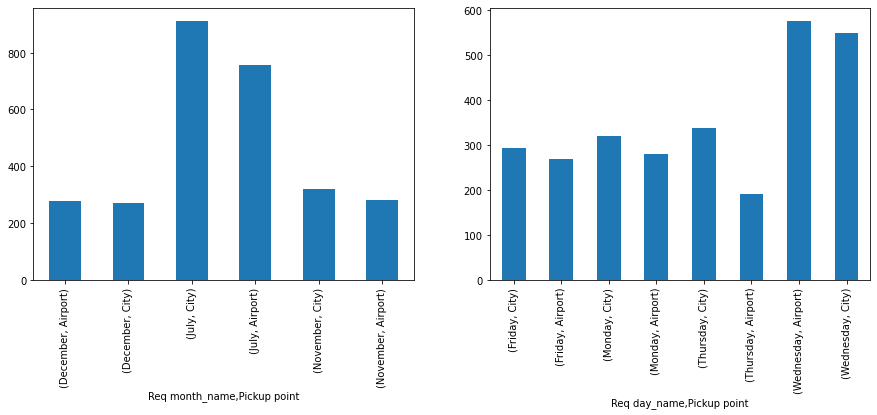

In [155]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data_completed.groupby("Req month_name")["Pickup point"].value_counts().plot(kind="bar")
plt.subplot(1,2,2)
data_completed.groupby("Req day_name")["Pickup point"].value_counts().plot(kind="bar");


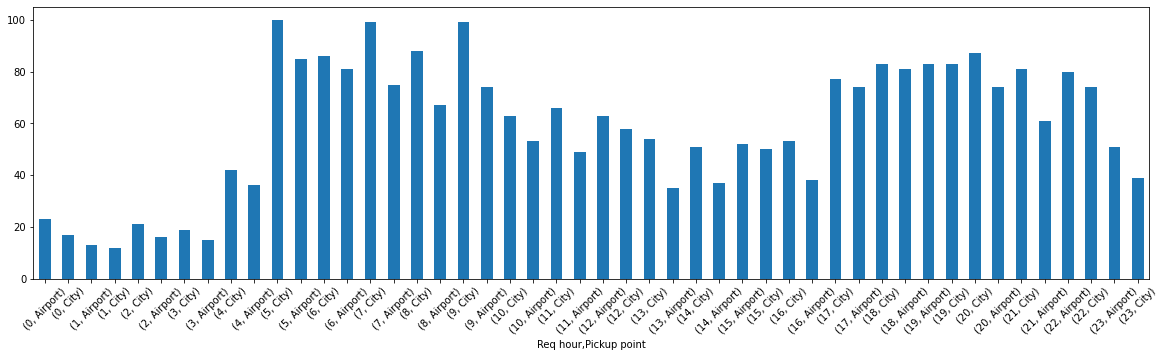

In [188]:
plt.figure(figsize=(20,5))
data_completed.groupby("Req hour")["Pickup point"].value_counts().plot(kind="bar")
plt.xticks(rotation=45);


## The largest number of no cars and cancelled trips Where ? 

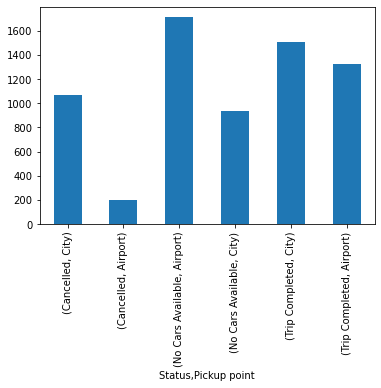

In [151]:
data.groupby("Status")["Pickup point"].value_counts().plot(kind="bar");
# uber have to cover airport with many cars